In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv("/content/WineQT.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.shape

(1143, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [9]:
df.describe().style.background_gradient()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [10]:
df.nunique().sort_values(ascending=True)

quality                    6
free sulfur dioxide       53
alcohol                   61
citric acid               77
residual sugar            80
pH                        87
sulphates                 89
fixed acidity             91
chlorides                131
volatile acidity         135
total sulfur dioxide     138
density                  388
Id                      1143
dtype: int64

In [11]:
df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [12]:
#Changing the range of quality variable from 3-8 to 0-5.
df['quality']=df['quality'].map({3:0,4:1,5:2,6:3,7:4,8:5})

In [13]:
df['quality'].value_counts()

2    483
3    462
4    143
1     33
5     16
0      6
Name: quality, dtype: int64

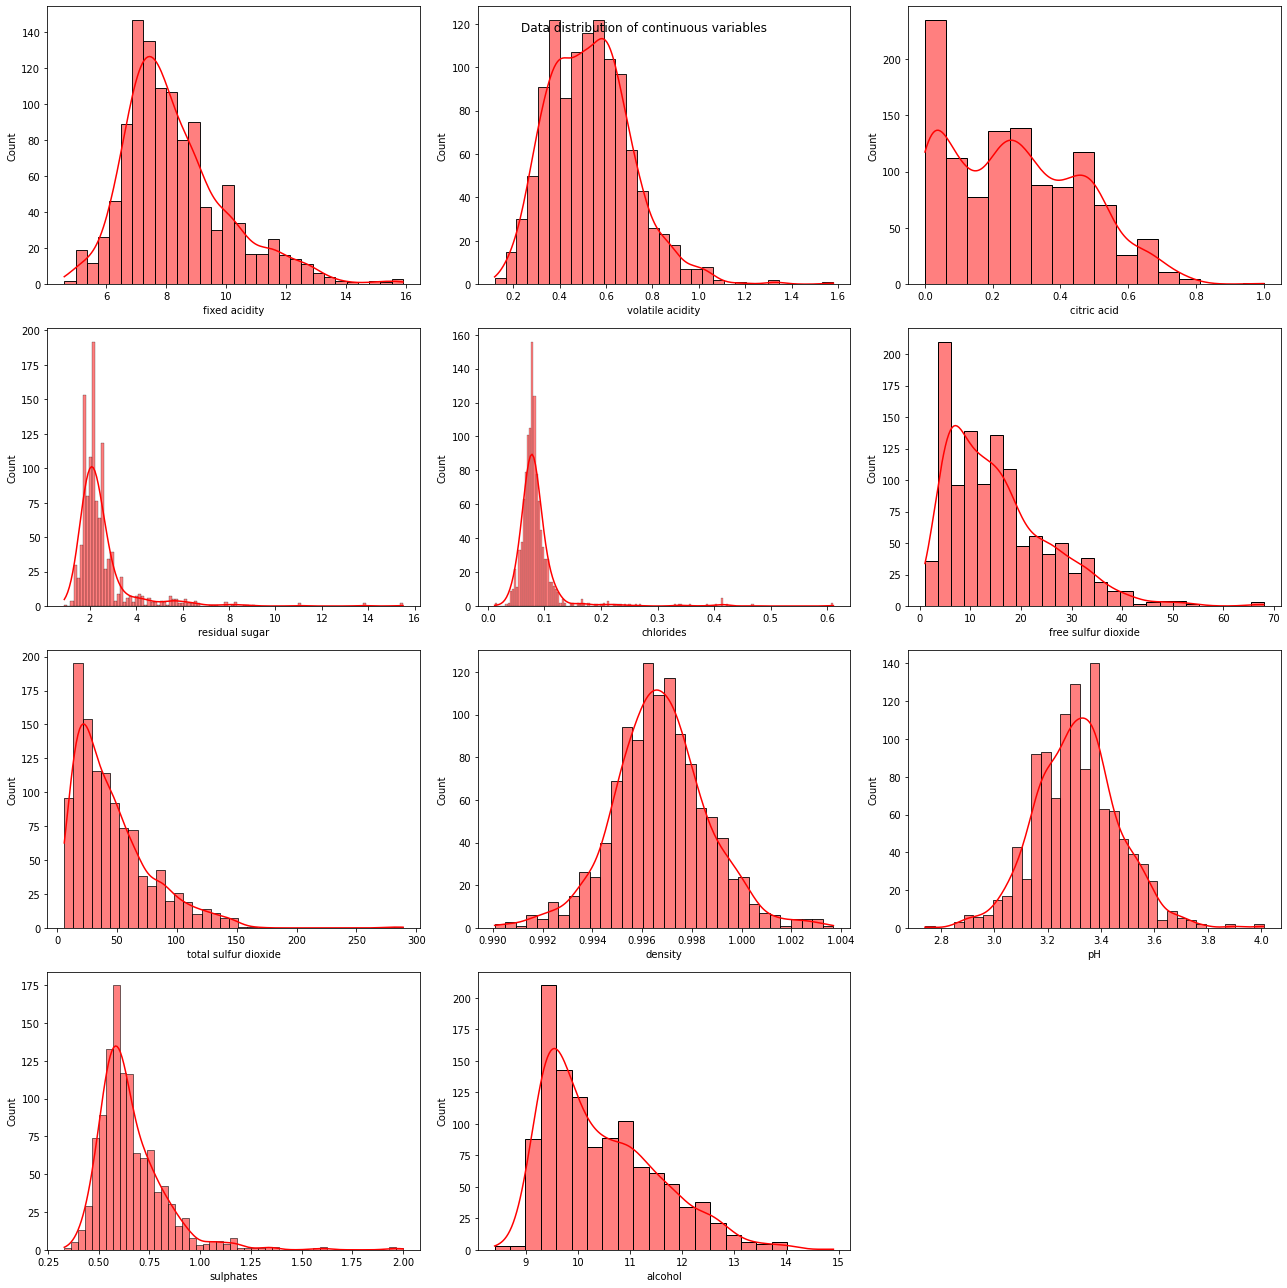

In [19]:
#checking the distribution
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

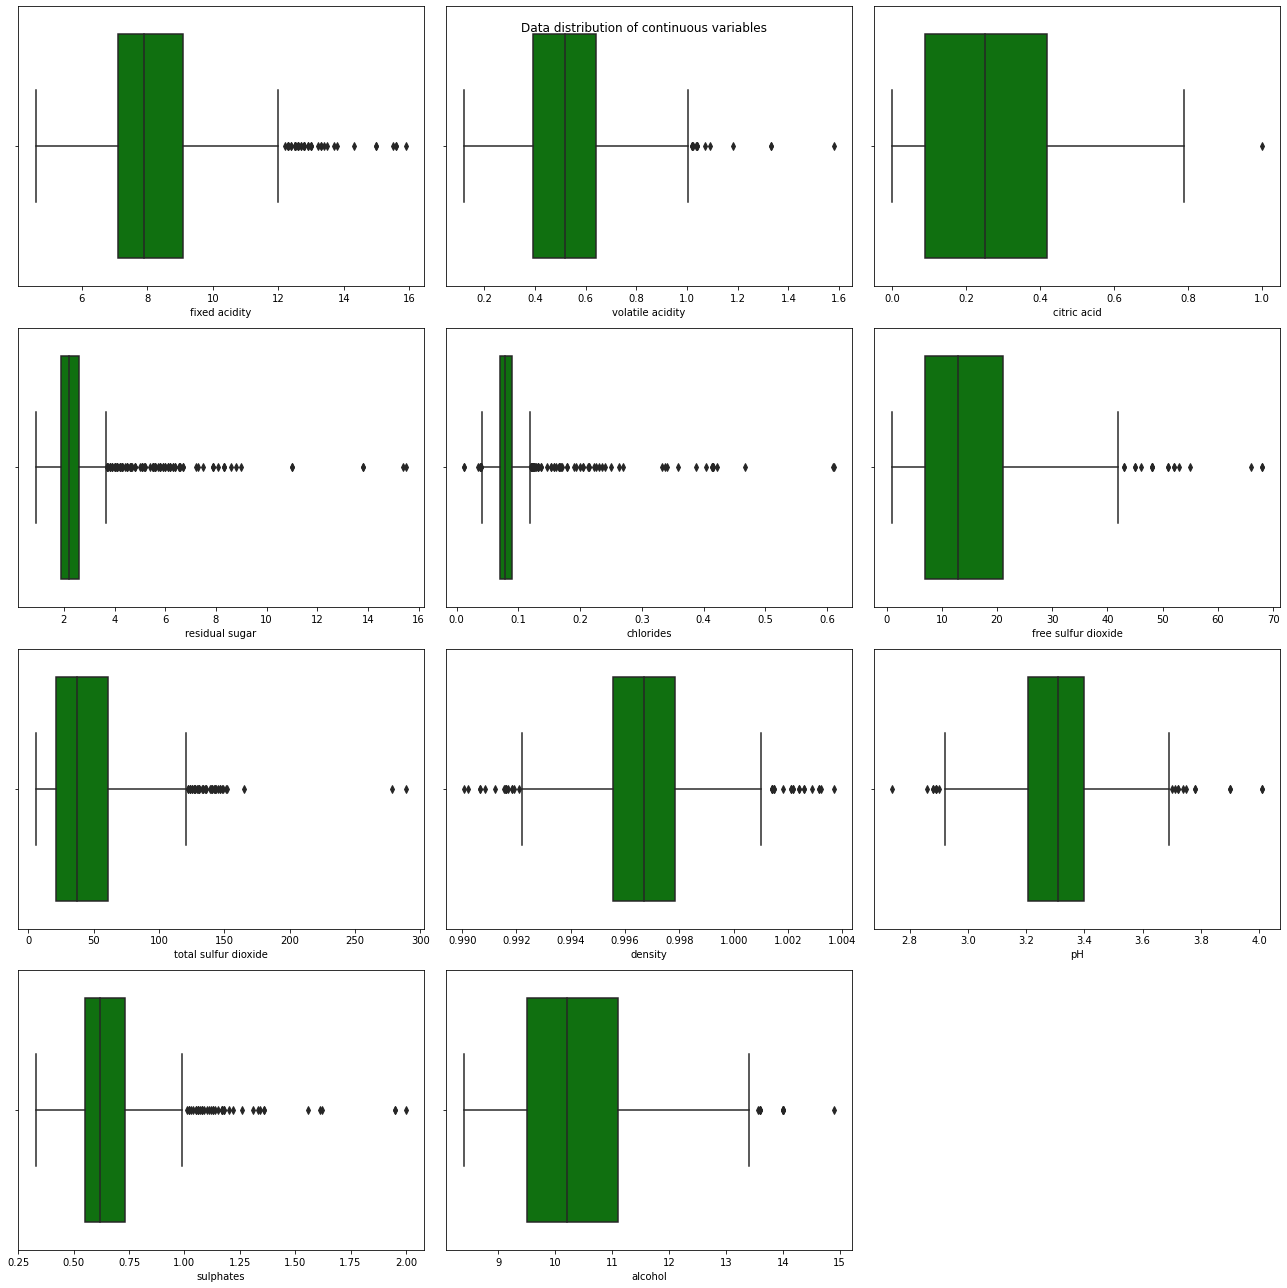

In [17]:
#checking the outliers using boxplot
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='green')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

In [20]:
def outlier_treating(data,var):
    df=data.copy()#creating a copy of the data
    def outlier_detector(data):#detecting the outliers
        outliers=[]
        q1=np.percentile(data,25)
        q3=np.percentile(data,75)
        IQR=q3-q1
        lb=q1-(IQR*1.5)
        ub=q3+(IQR*1.5)
        for i,j in enumerate(data):
            if(j<lb or j>ub):
                outliers.append(i)
        return outliers
    for i in var:
        out_var=outlier_detector(df[i])#calling outlier_detector function 
        df.loc[out_var,i]=np.median(df[i])#replacing the outliers to the median
    return df

In [21]:
#selecting variables that have outliers
var=list(df.select_dtypes(include=['float64']).columns)

In [22]:
df=outlier_treating(df,var)

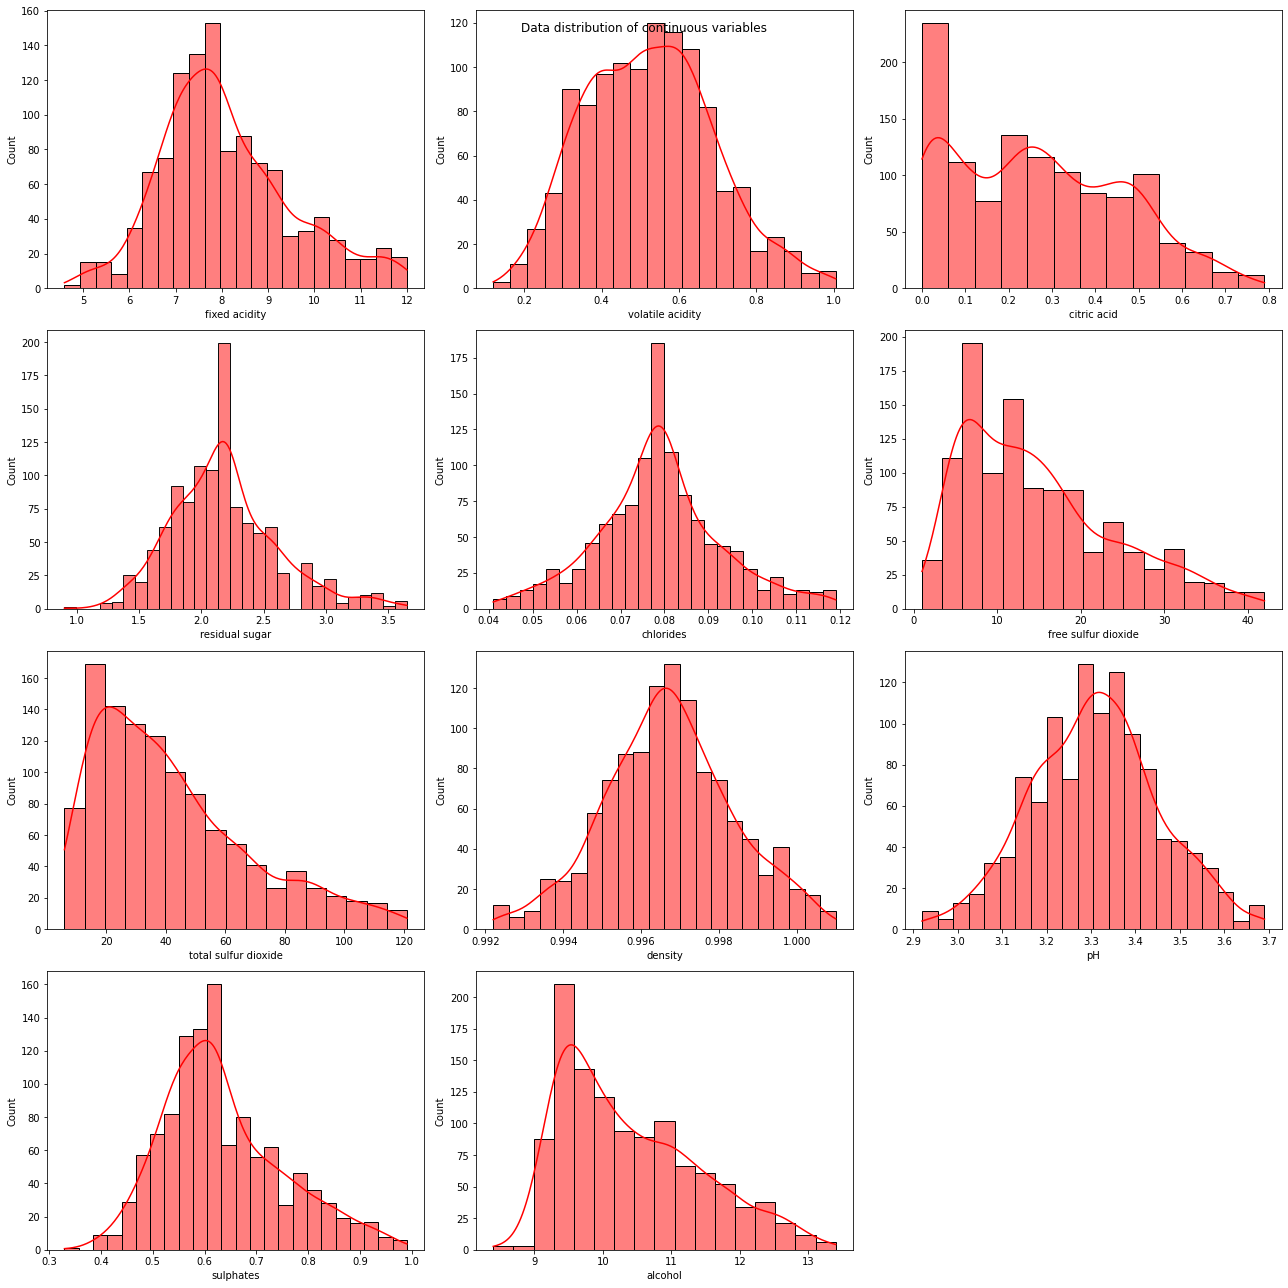

In [23]:
#After treating outliers
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

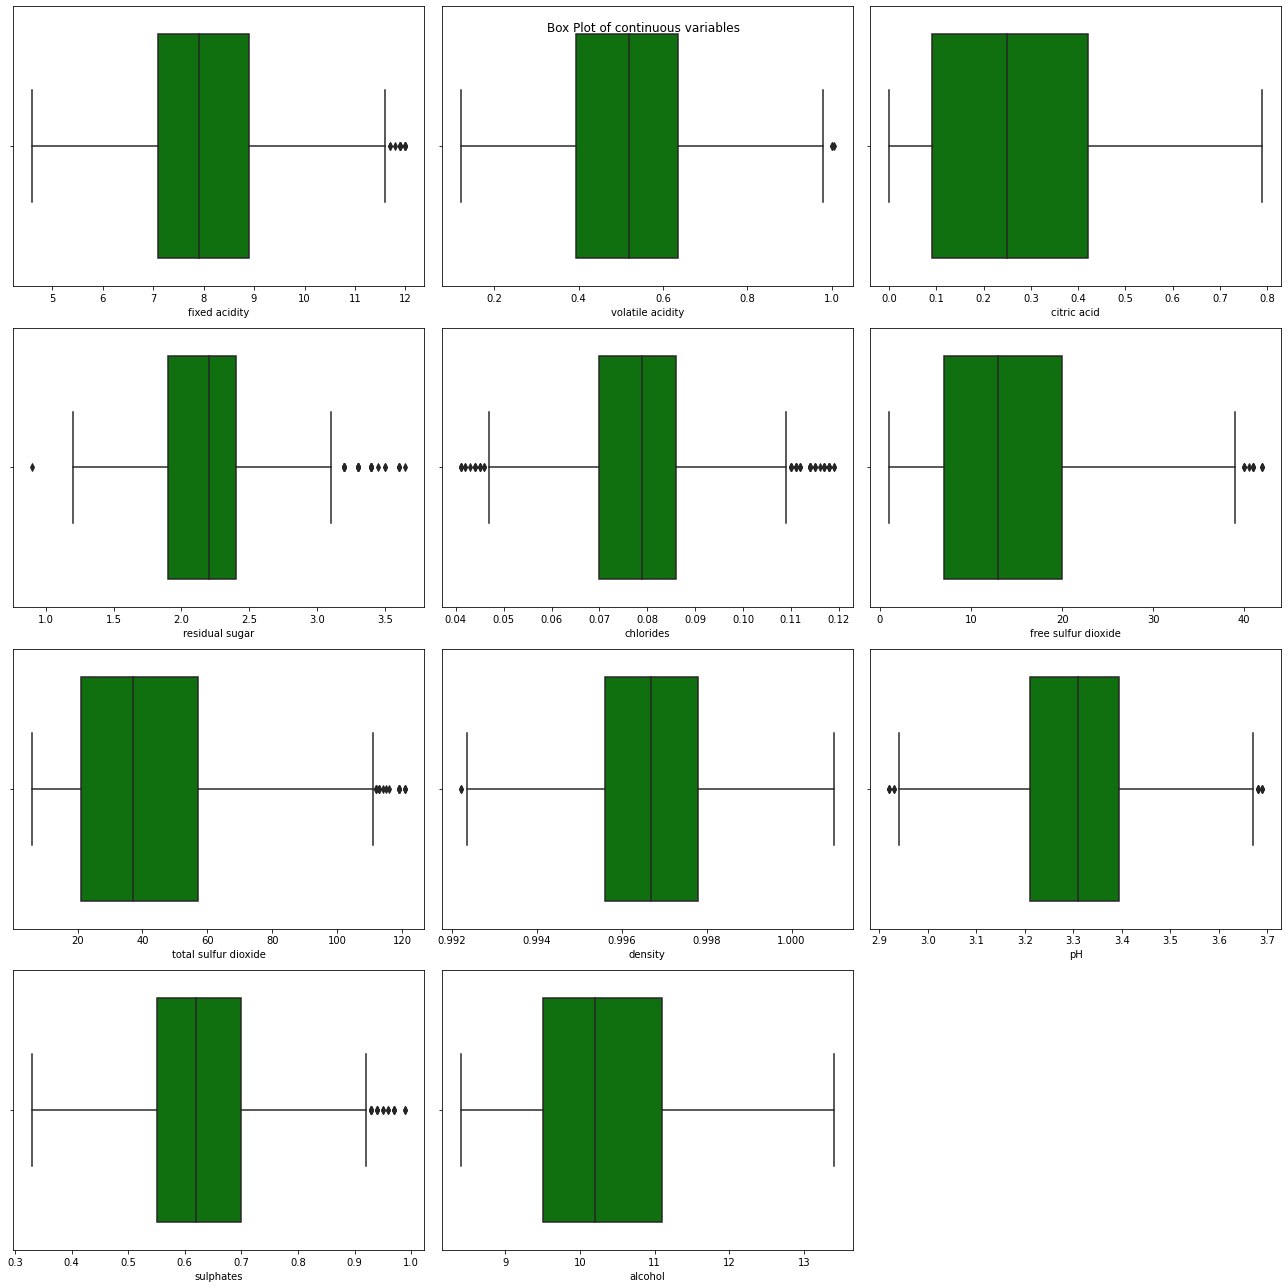

In [24]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='green')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

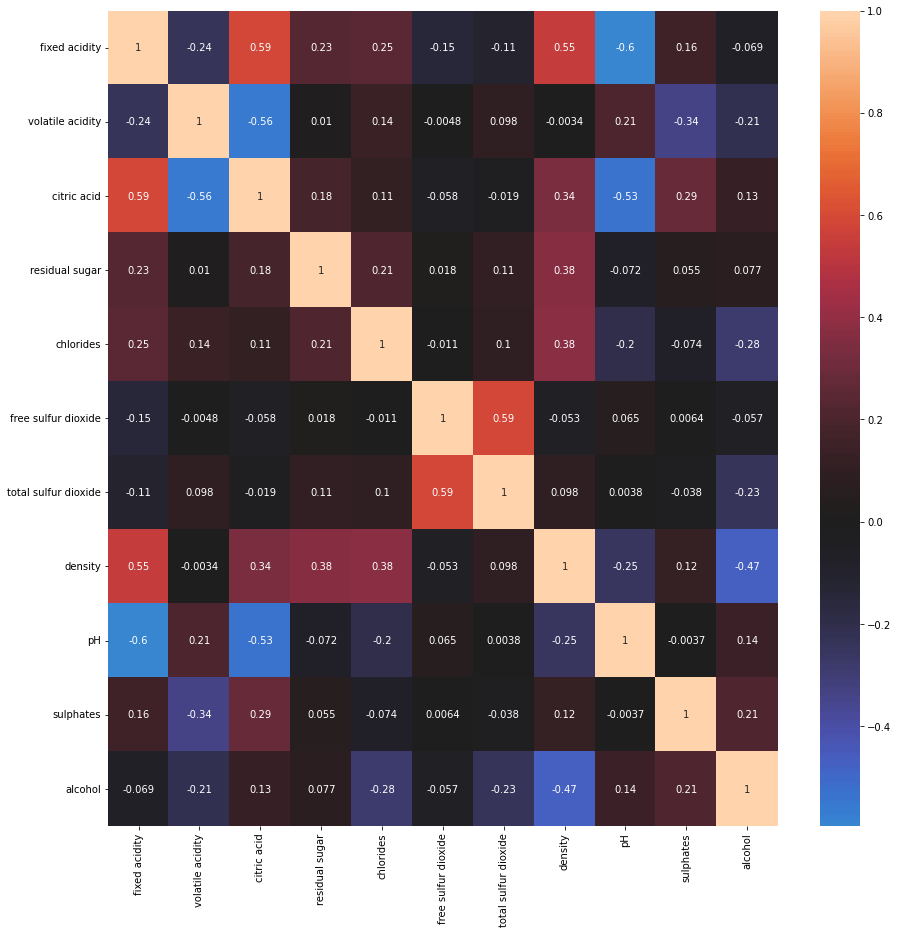

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(df.select_dtypes(include=['float']).corr(),annot=True,center = 0)
plt.show()

In [27]:
df.corr()['quality']

fixed acidity           0.105895
volatile acidity       -0.383660
citric acid             0.249202
residual sugar          0.019302
chlorides              -0.162429
free sulfur dioxide    -0.052056
total sulfur dioxide   -0.176450
density                -0.165958
pH                     -0.066524
sulphates               0.401198
alcohol                 0.476031
quality                 1.000000
Id                      0.069708
Name: quality, dtype: float64

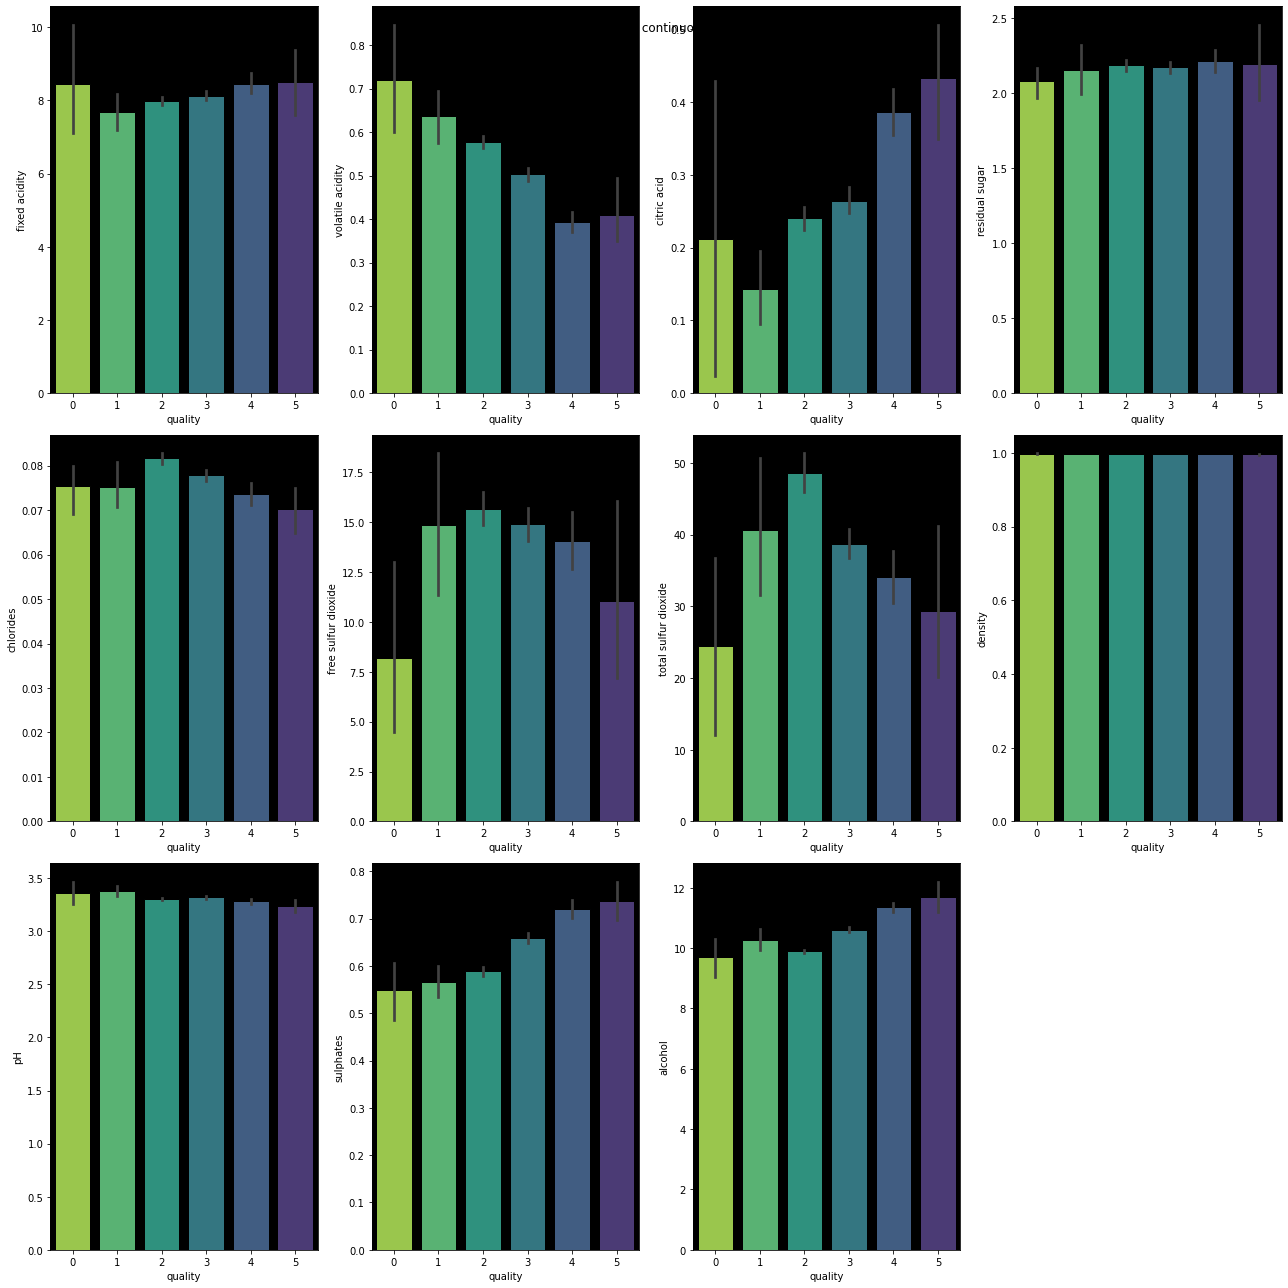

In [29]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(3,4, i+1)
    sns.barplot(data=df,x='quality', y=col, ax=ax,edgecolor="black",palette='viridis_r')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


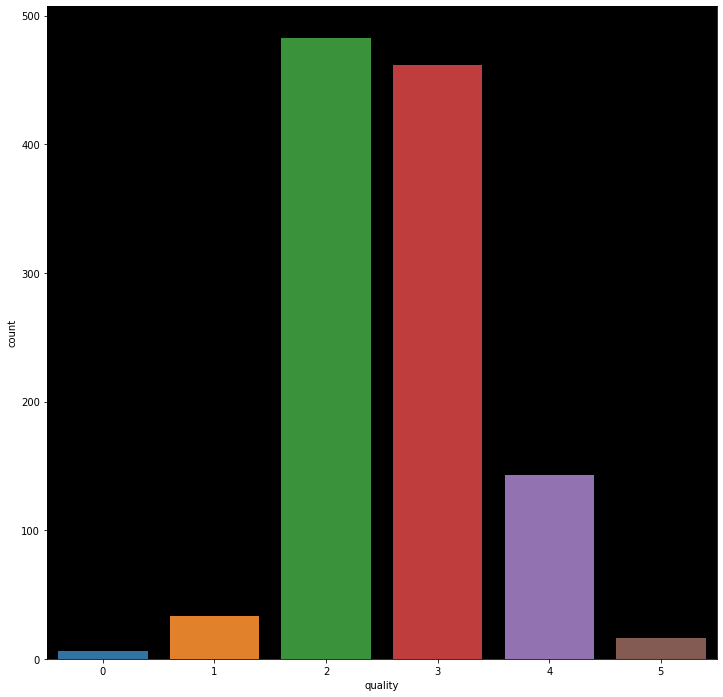

In [30]:
#check the balanced data
plt.figure(figsize=(12,12))
sns.countplot(df['quality'])

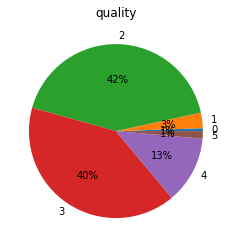

In [33]:
target_var=pd.crosstab(index=df['quality'],columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('quality')
plt.show()

In [34]:
X=df.iloc[:,0:-2]
y=df.iloc[:,-2]

In [36]:
#Balance the imbalanced data
from imblearn.over_sampling import SMOTE

In [37]:
sm = SMOTE(sampling_strategy='auto', random_state=42)

In [38]:
X,y=sm.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


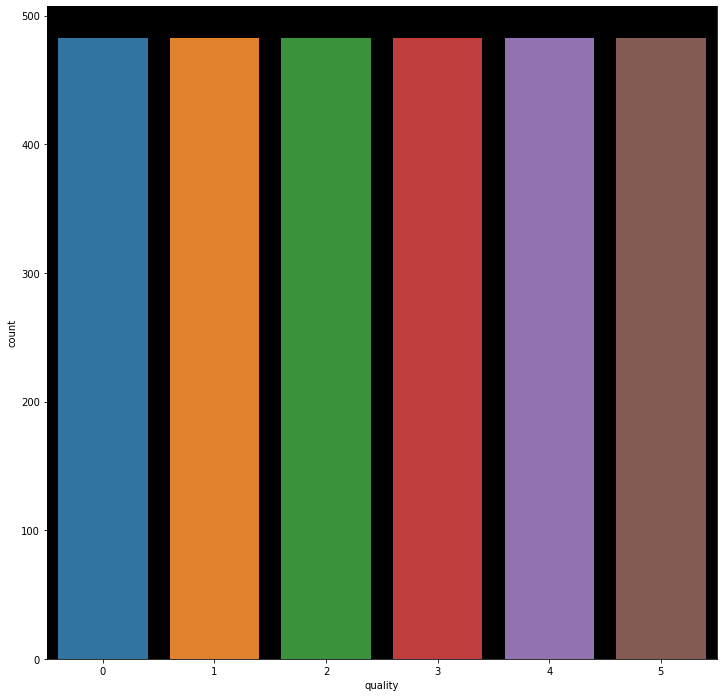

In [39]:
#Rechecking the balance of data
plt.figure(figsize=(12,12))
sns.countplot(y)
plt.show()

In [40]:
#Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif#ANOVA

In [41]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X, y)

SelectKBest(k='all')

In [42]:
feature_contribution=(fs.scores_/sum(fs.scores_))*100

fixed acidity : 2.01%
volatile acidity : 23.89%
citric acid : 11.12%
residual sugar : 0.68%
chlorides : 2.42%
free sulfur dioxide : 2.91%
total sulfur dioxide : 3.82%
density : 3.92%
pH : 5.86%
sulphates : 18.38%
alcohol : 25.00%


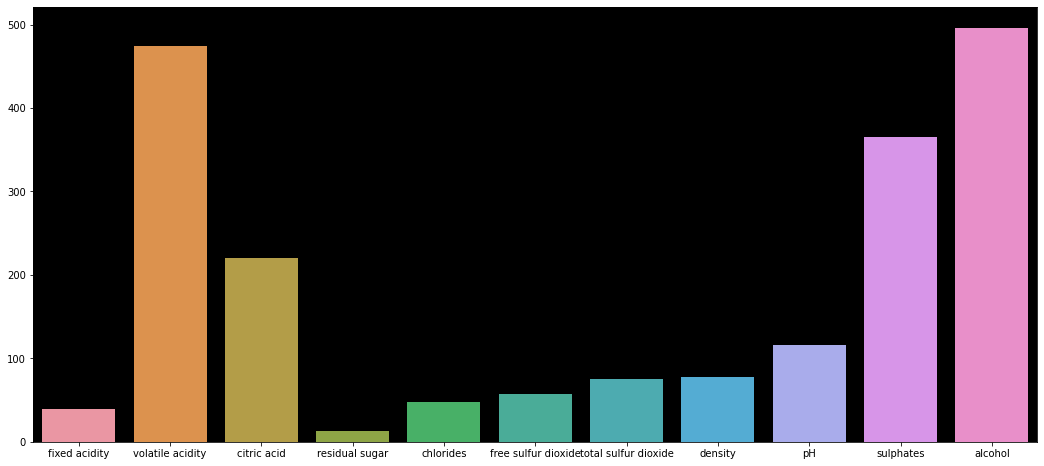

In [43]:
for i,j in enumerate(X.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')
plt.figure(figsize=(18,8))
sns.barplot(x=X.columns,y=fs.scores_)
plt.show()

In [44]:
X1=X[['volatile acidity','citric acid','chlorides','total sulfur dioxide','density','sulphates','alcohol']]

In [45]:
#Splitting data
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.20,stratify=y,random_state=0)

In [47]:
#Scaling data
from sklearn.preprocessing import StandardScaler

In [48]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [50]:
model_acc={}

In [51]:
#Decision tree
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [52]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_acc['Decision Tree']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Cross Val Accuracy: 75.06 %
Cross Val Standard Deviation: 0.73 %
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       100
           1       0.79      0.77      0.78       100
           2       0.53      0.56      0.55        91
           3       0.46      0.49      0.48        91
           4       0.75      0.71      0.73       103
           5       0.93      0.94      0.93        95

    accuracy                           0.74       580
   macro avg       0.74      0.74      0.74       580
weighted avg       0.75      0.74      0.74       580



In [53]:
#Random forest
classifier=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [54]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_acc['Random Forest']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Cross Val Accuracy: 79.03 %
Cross Val Standard Deviation: 1.44 %
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       105
           1       0.85      0.82      0.83       100
           2       0.62      0.61      0.62        99
           3       0.54      0.63      0.58        82
           4       0.79      0.79      0.79        98
           5       0.95      0.95      0.95        96

    accuracy                           0.79       580
   macro avg       0.79      0.79      0.79       580
weighted avg       0.80      0.79      0.79       580



In [55]:
#XGBoost
classifier = XGBClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [56]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_acc['Xg Boost']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Cross Val Accuracy: 72.61 %
Cross Val Standard Deviation: 1.55 %
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       110
           1       0.90      0.78      0.83       112
           2       0.51      0.60      0.55        81
           3       0.40      0.49      0.44        80
           4       0.68      0.70      0.69        94
           5       0.92      0.85      0.88       103

    accuracy                           0.73       580
   macro avg       0.73      0.72      0.72       580
weighted avg       0.76      0.73      0.74       580



In [57]:
#SVM
classifier=SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [58]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_acc['Support Vector Classifier']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Cross Val Accuracy: 69.11 %
Cross Val Standard Deviation: 0.92 %
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       116
           1       0.75      0.65      0.70       113
           2       0.50      0.53      0.52        90
           3       0.36      0.49      0.41        72
           4       0.62      0.74      0.67        81
           5       0.98      0.87      0.92       108

    accuracy                           0.70       580
   macro avg       0.70      0.69      0.69       580
weighted avg       0.74      0.70      0.71       580



In [60]:
#KNN
classifier=KNeighborsClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [61]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_acc['KNN']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Cross Val Accuracy: 74.33 %
Cross Val Standard Deviation: 0.99 %
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       107
           1       0.94      0.70      0.80       130
           2       0.46      0.59      0.51        75
           3       0.39      0.57      0.46        67
           4       0.74      0.76      0.75        95
           5       0.98      0.89      0.93       106

    accuracy                           0.75       580
   macro avg       0.75      0.73      0.74       580
weighted avg       0.80      0.75      0.77       580



In [62]:
#NB
classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [63]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_acc['Naive Bayes']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Cross Val Accuracy: 50.69 %
Cross Val Standard Deviation: 1.86 %
              precision    recall  f1-score   support

           0       0.84      0.65      0.73       124
           1       0.52      0.44      0.47       114
           2       0.35      0.42      0.39        80
           3       0.24      0.38      0.29        60
           4       0.37      0.43      0.40        84
           5       0.76      0.62      0.68       118

    accuracy                           0.51       580
   macro avg       0.51      0.49      0.49       580
weighted avg       0.56      0.51      0.53       580



In [64]:
#Model Accuracy
Model_com_df=pd.DataFrame(model_acc).T
Model_com_df.columns=['Model Accuracy','Model F1-Score','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Blues')

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Random Forest,79.14%,79.49%,79.03%,1.44%
KNN,75.17%,76.82%,74.33%,0.99%
Xg Boost,73.28%,74.39%,72.61%,1.55%
Decision Tree,73.97%,74.23%,75.06%,0.73%
Support Vector Classifier,70.17%,71.49%,69.11%,0.92%
Naive Bayes,51.21%,52.99%,50.69%,1.86%
